# K- Nearest Neighbours - Glass

#### Prepare a model for glass classification using KNN

## Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

## Import Data

In [2]:
Glass_Data=pd.read_csv("C:\\ExcelR\\Assignments\\KNN\\glass.csv")

In [3]:
Glass_Data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


## Data Understanding

RI : refractive index

Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

Mg: Magnesium

AI: Aluminum

Si: Silicon

K:Potassium

Ca: Calcium

Ba: Barium

Fe: Iron

Type: Type of glass: (class attribute)

1 -- building_windows_float_processed

2 --building_windows_non_float_processed
 
3 --vehicle_windows_float_processed
 
4 --vehicle_windows_non_float_processed (none in this database)
 
5 --containers
 
6 --tableware
 
7 --headlamps

In [4]:
Glass_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
Glass_Data.shape

(214, 10)

#### * No null entries found
#### * All Data points are either int or float

## Distribution of Independant variables

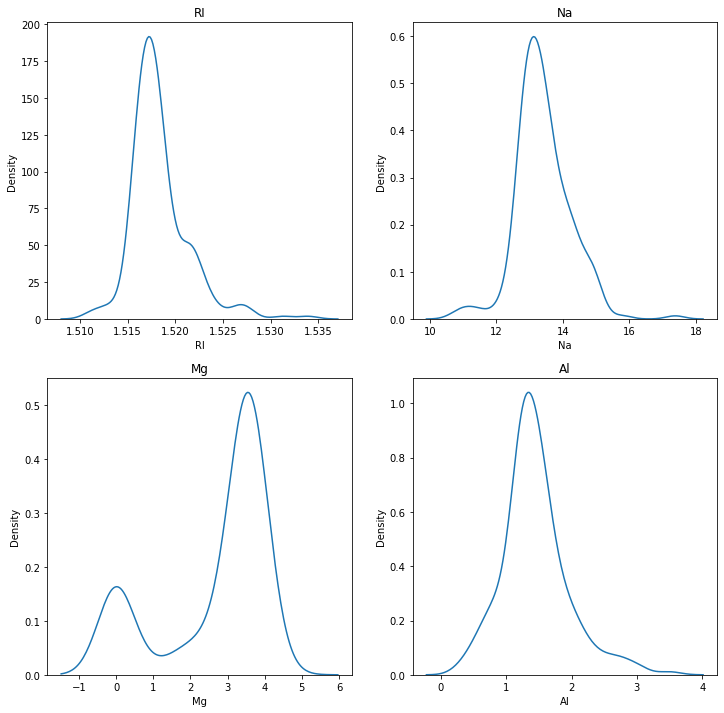

<Figure size 864x864 with 0 Axes>

In [6]:
Dist_fig_1,axes3=plt.subplots(2,2)
plt.figure(figsize=[12,12])

Dist_fig_1.set_figheight(12)
Dist_fig_1.set_figwidth(12)

sns.kdeplot(x="RI", data=Glass_Data,ax=axes3[0,0])
axes3[0,0].set_title("RI")

sns.kdeplot(x="Na", data=Glass_Data,ax=axes3[0,1])
axes3[0,1].set_title("Na")

sns.kdeplot(x="Mg", data=Glass_Data,ax=axes3[1,0])
axes3[1,0].set_title("Mg")

sns.kdeplot(x="Al", data=Glass_Data,ax=axes3[1,1])
axes3[1,1].set_title("Al")

plt.show()

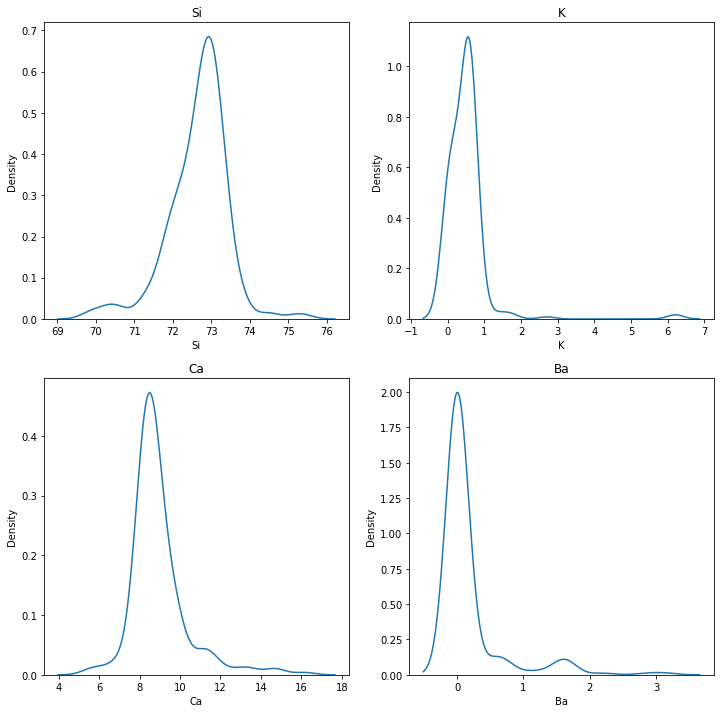

<Figure size 864x864 with 0 Axes>

In [7]:
Dist_fig_2,axes3=plt.subplots(2,2)
plt.figure(figsize=[12,12])

Dist_fig_2.set_figheight(12)
Dist_fig_2.set_figwidth(12)

sns.kdeplot(x="Si", data=Glass_Data,ax=axes3[0,0])
axes3[0,0].set_title("Si")

sns.kdeplot(x="K", data=Glass_Data,ax=axes3[0,1])
axes3[0,1].set_title("K")

sns.kdeplot(x="Ca", data=Glass_Data,ax=axes3[1,0])
axes3[1,0].set_title("Ca")

sns.kdeplot(x="Ba", data=Glass_Data,ax=axes3[1,1])
axes3[1,1].set_title("Ba")

plt.show()

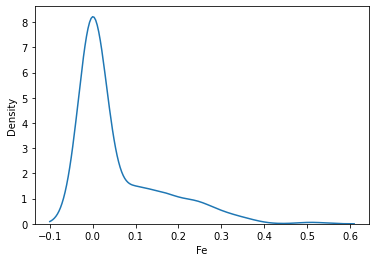

In [8]:
sns.kdeplot(x="Fe", data=Glass_Data)
plt.show()

## Seaparating Dependant and independant variables

In [9]:
Ind_Var=Glass_Data.drop("Type",axis=1)
y=Glass_Data["Type"]

## Data preprocessing

In [10]:
Standard_Scalar=StandardScaler()

In [11]:
X=pd.DataFrame(Standard_Scalar.fit_transform(Ind_Var))

In [12]:
X.head()

,0,1,2,3,4,5,6,7,8
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451


In [13]:
X.columns=Ind_Var.columns

In [14]:
X.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451


## Model Building || Model Training || Model Testing

In [15]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state= 12,stratify=y)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((171, 9), (171,), (43, 9), (43,))

## Generating a Model with K = 3

In [16]:
from sklearn.metrics import accuracy_score

Knn_model_3 = KNeighborsClassifier(n_neighbors=3)
Knn_model_3.fit(X_train,y_train)
y_pred = Knn_model_3.predict(X_test)

print("Accuracy score: ", round(accuracy_score(y_test,y_pred),4))

Accuracy score:  0.7674


## Generating a Model with K = 5

In [17]:
knn_model_5 = KNeighborsClassifier(n_neighbors=5)
knn_model_5.fit(X_train,y_train)
y_pred = knn_model_5.predict(X_test)
print("Accuracy score: ", round(accuracy_score(y_test,y_pred),4))

Accuracy score:  0.6512


## Generating a Model with K = 7

In [18]:
knn_model_7 = KNeighborsClassifier(n_neighbors=7)
knn_model_7.fit(X_train,y_train)
y_pred = knn_model_7.predict(X_test)
print("Accuracy score: ", round(accuracy_score(y_test,y_pred),4))

Accuracy score:  0.6279


## Model Optimization

### Grid Search CV

In [19]:
n_neighbors = np.array(range(1,51))
param_grid = dict(n_neighbors=n_neighbors)
param_grid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])}

In [21]:
loo=LeaveOneOut()

KNN = KNeighborsClassifier()
grid = GridSearchCV(estimator=KNN, param_grid=param_grid ,cv=loo)
grid.fit(X,y)

GridSearchCV(cv=LeaveOneOut(), estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])})

In [22]:
print(grid.best_params_,grid.best_score_)

{'n_neighbors': 3} 0.7242990654205608


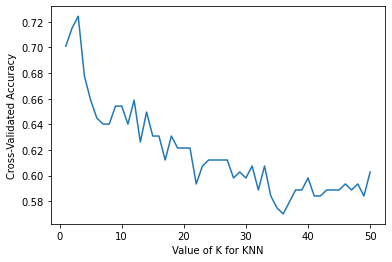

In [23]:
k_range=range(1,51)
k_scores=[]

for i in k_range:
    model=KNeighborsClassifier(n_neighbors=i)
    results=cross_val_score(model, X,y,cv=loo)
    k_scores.append(results.mean())

plt.plot(k_range,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

### Using manual Method

In [24]:
neighbours = list(range(1,50,2))
cv_scores = []

for i in neighbours:
    #print(i)
    knn_model = KNeighborsClassifier(n_neighbors = i)
    cv_score  = cross_val_score(estimator = knn_model,X=X,y=y,cv=10)
    #print(i,'-',cv_score.mean())
    cv_scores.append(cv_score.mean())

In [25]:
neighbours[cv_scores.index(max(cv_scores))]

3

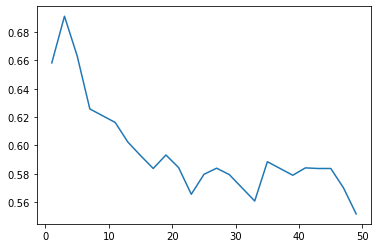

In [26]:
plt.plot(neighbours,cv_scores)
plt.show()

#### Best value of K is 3

### The model knn_model_3 is selected for deployment.